In [ ]:
% First data science tutorial... very good one 
% https://code.visualstudio.com/docs/python/data-science-tutorial

In [1]:
import pandas as pd 
import numpy as  np 
data = pd.read_csv('titanticdata.csv')

In [4]:
data.replace('?',np.nan,inplace= True)
data = data.astype({"age":np.float64, "fare":np.float64})


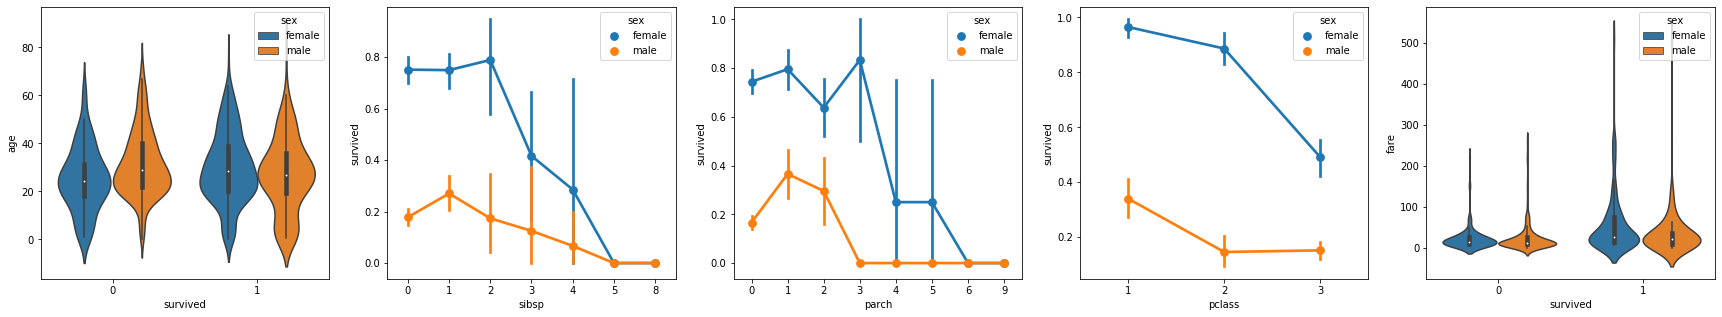

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=5,figsize=(30,5))
sns.violinplot(x="survived",y="age",hue="sex",data=data,ax=axs[0])
sns.pointplot(x="sibsp",y="survived",hue="sex",data=data,ax=axs[1])
sns.pointplot(x="parch",y="survived",hue="sex",data=data,ax=axs[2])
sns.pointplot(x="pclass",y="survived",hue="sex",data=data,ax=axs[3])
sns.violinplot(x="survived",y="fare",hue="sex",data=data,ax=axs[4])

In [10]:
data.replace({'male':1,'female':0},inplace=True)

In [11]:
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [12]:
data['relatives'] = data.apply(lambda row: int((row['sibsp']+row['parch']) > 0 ), axis=1)
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [13]:
data = data[['sex','pclass','age','relatives','fare','survived']].dropna()


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['sex','pclass','age','relatives','fare']],data.survived,test_size=0.2, random_state=0)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test  = sc.transform(x_test)


In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
from sklearn import metrics 
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,predict_test))


0.7464114832535885


In [18]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(5,kernel_initializer= 'uniform', activation= 'relu', input_dim = 5))
model.add(Dense(5,kernel_initializer= 'uniform', activation= 'relu'))
model.add(Dense(1,kernel_initializer= 'uniform', activation= 'sigmoid'))


Using TensorFlow backend.


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=50)


Epoch 1/50
836/836 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5610
Epoch 2/50
836/836 [==============================] - 0s 83us/step - loss: 0.6899 - accuracy: 0.5861
Epoch 3/50
836/836 [==============================] - 0s 84us/step - loss: 0.6846 - accuracy: 0.5885
Epoch 4/50
836/836 [==============================] - 0s 84us/step - loss: 0.6744 - accuracy: 0.6950
Epoch 5/50
836/836 [==============================] - 0s 86us/step - loss: 0.6574 - accuracy: 0.7500
Epoch 6/50
836/836 [==============================] - 0s 86us/step - loss: 0.6331 - accuracy: 0.7703
Epoch 7/50
836/836 [==============================] - 0s 83us/step - loss: 0.6046 - accuracy: 0.7703
Epoch 8/50
836/836 [==============================] - 0s 89us/step - loss: 0.5742 - accuracy: 0.7715
Epoch 9/50
836/836 [==============================] - 0s 83us/step - loss: 0.5446 - accuracy: 0.7703
Epoch 10/50
836/836 [==============================] - 0s 85us/step - loss: 0.5208 - accurac

In [21]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test,y_pred))


0.7751196172248804
